<a href="https://colab.research.google.com/github/dhiva29/Asthma-Detection/blob/main/Asthma_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Importing the Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Importing the Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# ---
# Cell 2: Data Collection and Analysis - Loading the dataset
# ---

# Loading the asthma dataset to a pandas DataFrame
try:
    asthma_dataset = pd.read_csv('asthma_disease_data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'asthma_disease_data.csv' not found. Please check the file path.")
    # In a real notebook, you might stop here. We'll create an empty df to prevent errors.
    asthma_dataset = pd.DataFrame()

Dataset loaded successfully.


In [ ]:
# ---
# Cell 3: Printing the first 5 rows of the dataset
# ---

if not asthma_dataset.empty:
    print("First 5 rows of the dataset:")
    print(asthma_dataset.head())

First 5 rows of the dataset:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       5034   63       0          1               0  15.848744        0   
1       5035   26       1          2               2  22.757042        0   
2       5036   57       0          2               1  18.395396        0   
3       5037   40       1          2               1  38.515278        0   
4       5038   61       0          0               3  19.283802        0   

   PhysicalActivity  DietQuality  SleepQuality  ...  LungFunctionFEV1  \
0          0.894448     5.488696      8.701003  ...          1.369051   
1          5.897329     6.341014      5.153966  ...          2.197767   
2          6.739367     9.196237      6.840647  ...          1.698011   
3          1.404503     5.826532      4.253036  ...          3.032037   
4          4.604493     3.127048      9.625799  ...          3.470589   

   LungFunctionFVC  Wheezing  ShortnessOfBreath  ChestTightness  Coughing  

In [ ]:
# ---
# Cell 4: Getting the number of rows and columns in this dataset
# ---

if not asthma_dataset.empty:
    print(f"Dataset shape (rows, columns): {asthma_dataset.shape}")

Dataset shape (rows, columns): (2392, 29)


In [ ]:
# ---
# Cell 5: Getting some statistical measures about the data
# ---

if not asthma_dataset.empty:
    print("\nStatistical measures of the numerical data:")
    print(asthma_dataset.describe())


Statistical measures of the numerical data:
         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2392.000000  2392.000000  2392.000000  2392.000000     2392.000000   
mean   6229.500000    42.137960     0.493311     0.669732        1.307274   
std     690.655244    21.606655     0.500060     0.986120        0.898242   
min    5034.000000     5.000000     0.000000     0.000000        0.000000   
25%    5631.750000    23.000000     0.000000     0.000000        1.000000   
50%    6229.500000    42.000000     0.000000     0.000000        1.000000   
75%    6827.250000    61.000000     1.000000     1.000000        2.000000   
max    7425.000000    79.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  PhysicalActivity  DietQuality  SleepQuality  \
count  2392.000000  2392.000000       2392.000000  2392.000000   2392.000000   
mean     27.244877     0.141722          5.051786     5.022867      7.019012   
std       7.201628   

In [ ]:
# ---
# Cell 6: Checking the distribution of the target variable 'Diagnosis'
# ---

if not asthma_dataset.empty:
    print("\nDistribution of the 'Diagnosis' target variable:")
    print(asthma_dataset['Diagnosis'].value_counts())
    # Note: 0 --> Non-Asthmatic, 1 --> Asthmatic.
    # This confirms the severe class imbalance.


Distribution of the 'Diagnosis' target variable:
Diagnosis
0    2268
1     124
Name: count, dtype: int64


In [ ]:
# ---
# Cell 7: Separating the data (features) and labels (target)
# ---

if not asthma_dataset.empty:
    # We drop non-predictive columns 'PatientID' and 'DoctorInCharge'
    X = asthma_dataset.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'], axis=1)
    Y = asthma_dataset['Diagnosis']
    print("Features (X) and Target (Y) have been separated.")
    print("\nFeatures (X):")
    print(X.head())
    print("\nTarget (Y):")
    print(Y.head())

Features (X) and Target (Y) have been separated.

Features (X):
   Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   63       0          1               0  15.848744        0   
1   26       1          2               2  22.757042        0   
2   57       0          2               1  18.395396        0   
3   40       1          2               1  38.515278        0   
4   61       0          0               3  19.283802        0   

   PhysicalActivity  DietQuality  SleepQuality  PollutionExposure  ...  \
0          0.894448     5.488696      8.701003           7.388481  ...   
1          5.897329     6.341014      5.153966           1.969838  ...   
2          6.739367     9.196237      6.840647           1.460593  ...   
3          1.404503     5.826532      4.253036           0.581905  ...   
4          4.604493     3.127048      9.625799           0.980875  ...   

   HayFever  GastroesophagealReflux  LungFunctionFEV1  LungFunctionFVC  \
0         0               

In [ ]:
# ---
# Cell 8: Splitting the data into Training data & Testing data
# ---

if not asthma_dataset.empty:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)
    print("Data successfully split into training and testing sets.")
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")

Data successfully split into training and testing sets.
Shape of X_train: (1674, 26)
Shape of X_test: (718, 26)


In [ ]:
# ---
# Cell 9: Handling Class Imbalance using SMOTE on the Training Data
# ---

if not asthma_dataset.empty:
    print("\nApplying SMOTE to the training data to handle class imbalance...")
    smote = SMOTE(random_state=42)
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
    print("SMOTE applied successfully.")
    print("\nNew distribution of the 'Diagnosis' target variable in the training set:")
    print(Y_train_resampled.value_counts())


Applying SMOTE to the training data to handle class imbalance...
SMOTE applied successfully.

New distribution of the 'Diagnosis' target variable in the training set:
Diagnosis
0    1587
1    1587
Name: count, dtype: int64


In [ ]:
# ---
# Cell 10: Data Standardization
# ---

if not asthma_dataset.empty:
    scaler = StandardScaler()
    # Fit the scaler on the resampled training data (as NumPy array to avoid feature name issues)
    scaler.fit(X_train_resampled.values)
    # Transform both the training and test data
    X_train_scaled = scaler.transform(X_train_resampled.values)
    X_test_scaled = scaler.transform(X_test.values)
    print("\nNumerical features have been standardized.")


Numerical features have been standardized.


In [ ]:
# ---
# Cell 11: Logistic Regression with Stratified K-Fold Cross-Validation
# ---

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

if not asthma_dataset.empty:
    print("\n==================== Logistic Regression with Stratified K-Fold ====================")

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    fold = 1
    for train_index, val_index in skf.split(X_train_resampled, Y_train_resampled):
        X_fold_train, X_fold_val = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
        Y_fold_train, Y_fold_val = Y_train_resampled.iloc[train_index], Y_train_resampled.iloc[val_index]

        # Standardize the fold data
        scaler_fold = StandardScaler()
        X_fold_train_scaled = scaler_fold.fit_transform(X_fold_train)
        X_fold_val_scaled = scaler_fold.transform(X_fold_val)

        # Train logistic regression model
        model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
        model_lr.fit(X_fold_train_scaled, Y_fold_train)

        # Predict and evaluate
        Y_pred_val = model_lr.predict(X_fold_val_scaled)

        print(f"\n--- Fold {fold} ---")
        print(classification_report(Y_fold_val, Y_pred_val))
        fold += 1



==================== Logistic Regression with Stratified K-Fold ====================

--- Fold 1 ---
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       318
           1       0.82      0.88      0.85       317

    accuracy                           0.84       635
   macro avg       0.84      0.84      0.84       635
weighted avg       0.84      0.84      0.84       635


--- Fold 2 ---
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       318
           1       0.84      0.84      0.84       317

    accuracy                           0.84       635
   macro avg       0.84      0.84      0.84       635
weighted avg       0.84      0.84      0.84       635


--- Fold 3 ---
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       317
           1       0.83      0.89      0.86       318

    accuracy                           0.86     

In [ ]:
# ---
# Cell 12: Decision Tree with Stratified K-Fold Cross-Validation
# ---

from sklearn.tree import DecisionTreeClassifier

if not asthma_dataset.empty:
    print("\n==================== Decision Tree with Stratified K-Fold ====================")

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    fold = 1
    for train_index, val_index in skf.split(X_train_resampled, Y_train_resampled):
        X_fold_train, X_fold_val = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
        Y_fold_train, Y_fold_val = Y_train_resampled.iloc[train_index], Y_train_resampled.iloc[val_index]

        scaler_fold = StandardScaler()
        X_fold_train_scaled = scaler_fold.fit_transform(X_fold_train)
        X_fold_val_scaled = scaler_fold.transform(X_fold_val)

        model_dt = DecisionTreeClassifier()
        model_dt.fit(X_fold_train_scaled, Y_fold_train)
        Y_pred_val = model_dt.predict(X_fold_val_scaled)

        print(f"\n--- Fold {fold} ---")
        print(classification_report(Y_fold_val, Y_pred_val))
        fold += 1



==================== Decision Tree with Stratified K-Fold ====================

--- Fold 1 ---
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       318
           1       0.85      0.91      0.88       317

    accuracy                           0.88       635
   macro avg       0.88      0.88      0.88       635
weighted avg       0.88      0.88      0.88       635


--- Fold 2 ---
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.86      0.88      0.87       317

    accuracy                           0.87       635
   macro avg       0.87      0.87      0.87       635
weighted avg       0.87      0.87      0.87       635


--- Fold 3 ---
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       317
           1       0.86      0.95      0.90       318

    accuracy                           0.90       635


In [ ]:
# ---
# Cell 13: Random Forest with Stratified K-Fold Cross-Validation
# ---

from sklearn.ensemble import RandomForestClassifier

if not asthma_dataset.empty:
    print("\n==================== Random Forest with Stratified K-Fold ====================")

    skf = StratifiedKFold(n_splits=50, shuffle=True, random_state=42)

    fold = 1
    for train_index, val_index in skf.split(X_train_resampled, Y_train_resampled):
        X_fold_train, X_fold_val = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
        Y_fold_train, Y_fold_val = Y_train_resampled.iloc[train_index], Y_train_resampled.iloc[val_index]

        scaler_fold = StandardScaler()
        X_fold_train_scaled = scaler_fold.fit_transform(X_fold_train)
        X_fold_val_scaled = scaler_fold.transform(X_fold_val)

        model_rf = RandomForestClassifier()
        model_rf.fit(X_fold_train_scaled, Y_fold_train)
        Y_pred_val = model_rf.predict(X_fold_val_scaled)

        print(f"\n--- Fold {fold} ---")
        print(classification_report(Y_fold_val, Y_pred_val))
        fold += 1



==================== Random Forest with Stratified K-Fold ====================

--- Fold 1 ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.88      0.93        32

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64


--- Fold 2 ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.97      1.00      0.98        32

    accuracy                           0.98        64
   macro avg       0.98      0.98      0.98        64
weighted avg       0.98      0.98      0.98        64


--- Fold 3 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        32

    accuracy                           1.00        64


In [ ]:
# ---
# Cell 14: Gradient Boosting with Stratified K-Fold Cross-Validation
# ---

from sklearn.ensemble import GradientBoostingClassifier

if not asthma_dataset.empty:
    print("\n==================== Gradient Boosting with Stratified K-Fold ====================")

    skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

    fold = 1
    for train_index, val_index in skf.split(X_train_resampled, Y_train_resampled):
        X_fold_train, X_fold_val = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
        Y_fold_train, Y_fold_val = Y_train_resampled.iloc[train_index], Y_train_resampled.iloc[val_index]

        scaler_fold = StandardScaler()
        X_fold_train_scaled = scaler_fold.fit_transform(X_fold_train)
        X_fold_val_scaled = scaler_fold.transform(X_fold_val)

        model_gb = GradientBoostingClassifier()
        model_gb.fit(X_fold_train_scaled, Y_fold_train)
        Y_pred_val = model_gb.predict(X_fold_val_scaled)

        print(f"\n--- Fold {fold} ---")
        print(classification_report(Y_fold_val, Y_pred_val))
        fold += 1



==================== Gradient Boosting with Stratified K-Fold ====================

--- Fold 1 ---
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       106
           1       0.92      0.96      0.94       106

    accuracy                           0.94       212
   macro avg       0.94      0.94      0.94       212
weighted avg       0.94      0.94      0.94       212


--- Fold 2 ---
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       106
           1       0.94      0.95      0.95       106

    accuracy                           0.95       212
   macro avg       0.95      0.95      0.95       212
weighted avg       0.95      0.95      0.95       212


--- Fold 3 ---
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       106
           1       0.88      0.96      0.92       106

    accuracy                           0.92       

In [ ]:
if not asthma_dataset.empty:
    # Example input data for a single patient (matches the original feature order, 26 features)
    input_data = (63,0,1,0,15.84,0,0.89,5.48,8.7,7.38,2.85,0.97,1,1,0,0,0,0,1.36,4.94,0,0,1,0,0,1)

    # Ensure input matches the expected number of features (26)
    expected_features = 26 # Based on the training data after dropping columns
    if len(input_data) != expected_features:
        print(f"Error: Input data has {len(input_data)} features, but {expected_features} are expected.")
    else:
        input_data_array = np.asarray(input_data).reshape(1, -1)

        # Scale the input data using the fitted scaler
        std_data = scaler.transform(input_data_array)

        prediction = model_rf.predict(std_data)

        print(f"\nPrediction Input Shape: {std_data.shape}")
        print(f"Model Prediction: {prediction}")

        if prediction[0] == 0:
            print('The person is not asthmatic.')
        else:
            print('The person is asthmatic.')


Prediction Input Shape: (1, 26)
Model Prediction: [0]
The person is not asthmatic.


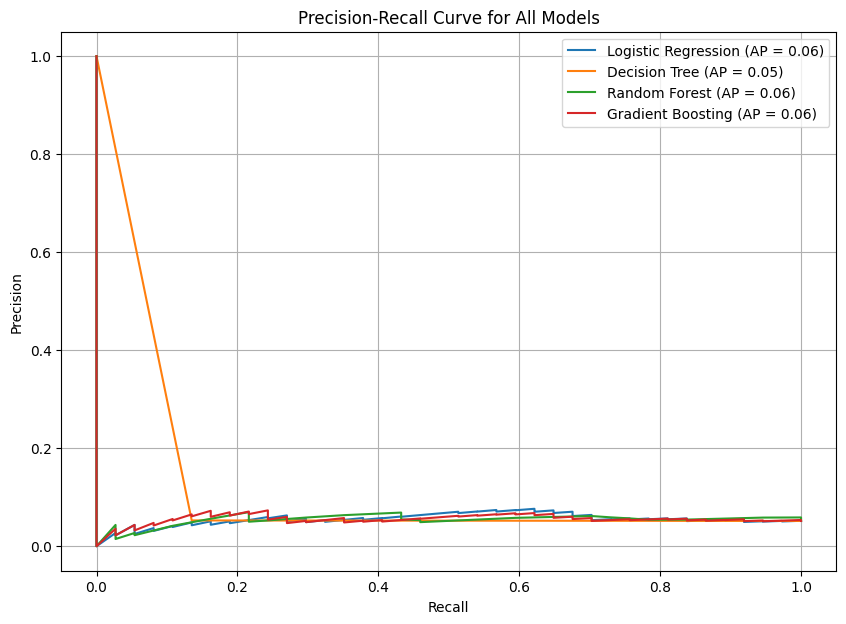

In [ ]:
# ---
# Cell XX: Precision-Recall Curve for All Models
# ---

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

if not asthma_dataset.empty:
    models = {
        "Logistic Regression": model_lr,
        "Decision Tree": model_dt,
        "Random Forest": model_rf,
        "Gradient Boosting": model_gb
    }

    plt.figure(figsize=(10, 7))

    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_probs = model.decision_function(X_test_scaled)

        precision, recall, _ = precision_recall_curve(Y_test, y_probs)
        avg_precision = average_precision_score(Y_test, y_probs)

        plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve for All Models")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
